In [47]:
import numpy as np
import pandas as pd
import networkx as nx
from martignac.workflows.solute_in_bilayer_umbrella import project
from martignac.nomad.workflows import NomadWorkflow
import matplotlib.pyplot as plt

In [48]:
project.to_dataframe().sort_values("sp.depth_from_bilayer_core")

,sp.type,sp.lipids,sp.solute_name,sp.depth_from_bilayer_core,doc.SoluteInBilayerUmbrellaFlow,doc.SoluteGenFlow,doc.BilayerGenFlow
e7df35fe98283aae548284dd0c27dd05,solute_in_bilayer,"[{'name': 'M3.POPC', 'fraction': 1.0}]","C1 P3, 0-1",0.00,"{'files_symlinked': True, 'fetched_nomad': Tru...","{'files_symlinked': True, 'fetched_nomad': Tru...","{'files_symlinked': True, 'fetched_nomad': Tru..."
75cc614ccfc65bad2381ad4c77d69024,solute_in_bilayer,"[{'name': 'M3.POPC', 'fraction': 1.0}]","C1 P3, 0-1",0.05,"{'files_symlinked': True, 'fetched_nomad': Tru...","{'files_symlinked': True, 'fetched_nomad': Tru...","{'files_symlinked': True, 'fetched_nomad': Tru..."
3fcc84b3bf5895db2ad661843728566d,solute_in_bilayer,"[{'name': 'M3.POPC', 'fraction': 1.0}]","C1 P3, 0-1",0.10,"{'files_symlinked': True, 'fetched_nomad': Tru...","{'files_symlinked': True, 'fetched_nomad': Tru...","{'files_symlinked': True, 'fetched_nomad': Tru..."
d303841e747ef138b3d687a848bec9f4,solute_in_bilayer,"[{'name': 'M3.POPC', 'fraction': 1.0}]","C1 P3, 0-1",0.15,"{'files_symlinked': True, 'fetched_nomad': Tru...","{'files_symlinked': True, 'fetched_nomad': Tru...","{'files_symlinked': True, 'fetched_nomad': Tru..."
29db84e4f59663e5457da965cff01a36,solute_in_bilayer,"[{'name': 'M3.POPC', 'fraction': 1.0}]","C1 P3, 0-1",0.20,"{'files_symlinked': True, 'fetched_nomad': Tru...","{'files_symlinked': True, 'fetched_nomad': Tru...","{'files_symlinked': True, 'fetched_nomad': Tru..."
...,...,...,...,...,...,...,...
775354d07b9a636aa009968dd85a6d48,solute_in_bilayer,"[{'name': 'M3.POPC', 'fraction': 1.0}]","C1 P3, 0-1",3.80,"{'files_symlinked': True, 'fetched_nomad': Tru...","{'files_symlinked': True, 'fetched_nomad': Tru...","{'files_symlinked': True, 'fetched_nomad': Tru..."
6a1a2255246419d4470d3d43037a507f,solute_in_bilayer,"[{'name': 'M3.POPC', 'fraction': 1.0}]","C1 P3, 0-1",3.85,"{'files_symlinked': True, 'fetched_nomad': Tru...","{'files_symlinked': True, 'fetched_nomad': Tru...","{'files_symlinked': True, 'fetched_nomad': Tru..."
80cdf120670ecadeda9fdf66f8649007,solute_in_bilayer,"[{'name': 'M3.POPC', 'fraction': 1.0}]","C1 P3, 0-1",3.90,"{'files_symlinked': True, 'fetched_nomad': Tru...","{'files_symlinked': True, 'fetched_nomad': Tru...","{'files_symlinked': True, 'fetched_nomad': Tru..."
345b8a6185019269ac578d40b4439768,solute_in_bilayer,"[{'name': 'M3.POPC', 'fraction': 1.0}]","C1 P3, 0-1",3.95,"{'files_symlinked': True, 'fetched_nomad': Tru...","{'files_symlinked': True, 'fetched_nomad': Tru...","{'files_symlinked': True, 'fetched_nomad': Tru..."


In [49]:
jobs = list(project.find_jobs())
jobs = sorted(jobs, key=lambda x: x.sp.depth_from_bilayer_core)
jobs[:10]

[Job(project=SoluteInBilayerUmbrellaFlow('/Users/bereau/work/projects/martignac/workspaces/solute_in_bilayer'), statepoint={'type': 'solute_in_bilayer', 'lipids': [{'name': 'M3.POPC', 'fraction': 1.0}], 'solute_name': 'C1 P3, 0-1', 'depth_from_bilayer_core': 0.0}),
 Job(project=SoluteInBilayerUmbrellaFlow('/Users/bereau/work/projects/martignac/workspaces/solute_in_bilayer'), statepoint={'type': 'solute_in_bilayer', 'lipids': [{'name': 'M3.POPC', 'fraction': 1.0}], 'solute_name': 'C1 P3, 0-1', 'depth_from_bilayer_core': 0.05}),
 Job(project=SoluteInBilayerUmbrellaFlow('/Users/bereau/work/projects/martignac/workspaces/solute_in_bilayer'), statepoint={'type': 'solute_in_bilayer', 'lipids': [{'name': 'M3.POPC', 'fraction': 1.0}], 'solute_name': 'C1 P3, 0-1', 'depth_from_bilayer_core': 0.1}),
 Job(project=SoluteInBilayerUmbrellaFlow('/Users/bereau/work/projects/martignac/workspaces/solute_in_bilayer'), statepoint={'type': 'solute_in_bilayer', 'lipids': [{'name': 'M3.POPC', 'fraction': 1.0}]

In [50]:
pmf_profile = np.load(jobs[0].fn("wham_bstrap.npy"))
pmf_profile.shape

(3, 200)

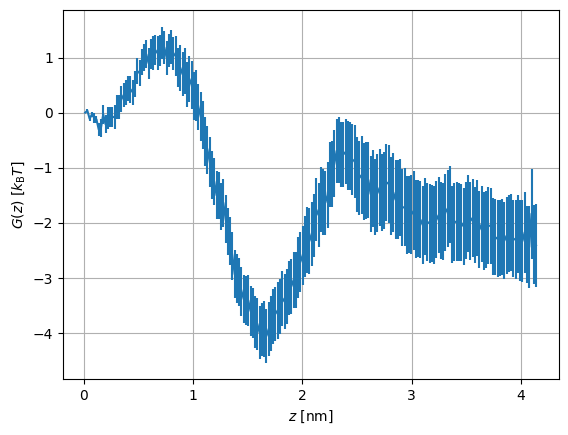

In [51]:
plt.errorbar(
    pmf_profile[0], pmf_profile[1], yerr=pmf_profile[2]
)
plt.xlabel(r"$z$ [nm]")
plt.ylabel(r"$G(z)~[k_\mathrm{B}T]$")
plt.grid();

In [25]:
counts = np.load(jobs[0].fn("wham_hist.npy"))
counts.shape

(82, 200)

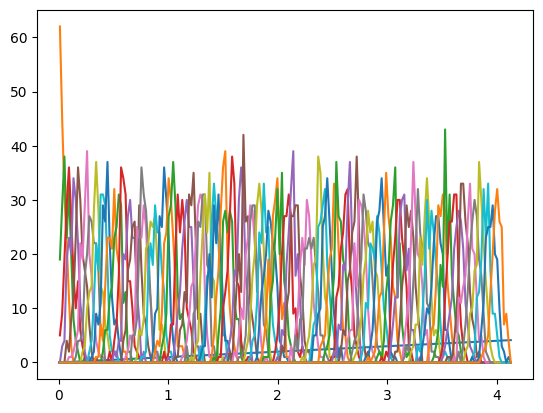

In [42]:
for i in range(0, counts.shape[0]):
    plt.plot(counts[0], counts[i])